# RNN on Text data(Sentiment Analysis)

## what is RNN 
- RNN = Recurrent Neural Network
- used for Sequential Data(text,time series etc)
- it remembers previous inputs in a sequence
- why its useful : words in a sentence have order and context - RNN can remember what came before 

## Limitations of vanilla RNN
- Struggle with long term dependencies(i.e remembering words from much earlier)
- this is fixed by LSTM(long short-term memory) and GRU (gated recurrent unit)

## what is sentiment analysis
- A task where we classify text into positive or negative sentiment
- for example - "i love this movie"=> Positive

### Dataset
- we will use imdb movies review dataset(comes with Keras)
- it has 25000 training reviews
- 25000 testing reviews
- already labelled as 0 (negative) or numeric 1(positive)

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the Datasets

In [7]:
(x_train,y_train),(x_test,y_test)=keras.datasets.imdb.load_data(num_words=10000)
# only keep the top 10000 more frequent words to reduce complexity 

In [8]:
# pad sequences so they are all the same length 
x_train=keras.preprocessing.sequence.pad_sequences(x_train,maxlen=200)
x_test=keras.preprocessing.sequence.pad_sequences(x_test,maxlen=200)

# explanation
- reviews are encoded as integers (each word has an index)
- pad_sequences ensures all reviews are 200 words long by padding shorter one's

In [9]:
# build the model
model= keras.Sequential([layers.Embedding(input_dim=10000,output_dim=10000,input_length=200),layers.LSTM(64),layers.Dense(1,activation='sigmoid')])

# explanation

- embedding : transforms each word index into a dense vector of size 32 
- LSTM : remembers seqence information
- dense : final layer with sigmoid for probability output(0 or1)

In [10]:
# compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

- binary_crossentropy is used for binary classification
- adam is a powerful optimizer
- accuracy to track performance

# train the model

In [11]:
history = model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5


C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow\python\framework\indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 100000000 elements. This may consume a large amount of memory.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 1829s 6s/step - accuracy: 0.7587 - loss: 0.4945 - val_accuracy: 0.8414 - val_loss: 0.3763
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4378s 14s/step - accuracy: 0.8663 - loss: 0.3195 - val_accuracy: 0.8360 - val_loss: 0.3905
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1532s 5s/step - accuracy: 0.9107 - loss: 0.2265 - val_accuracy: 0.8548 - val_loss: 0.3730
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1533s 5s/step - accuracy: 0.9556 - loss: 0.1280 - val_accuracy: 0.8508 - val_loss: 0.4149
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1447s 5s/step - accuracy: 0.9777 - loss: 0.0716 - val_accuracy: 0.8456 - val_loss: 0.4878


### Evaluate

In [13]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print(f"Test Accuracy: {test_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 528s 670ms/step - accuracy: 0.8373 - loss: 0.5045
Test Accuracy: 0.8373200297355652


### Plot Accuracy and loss

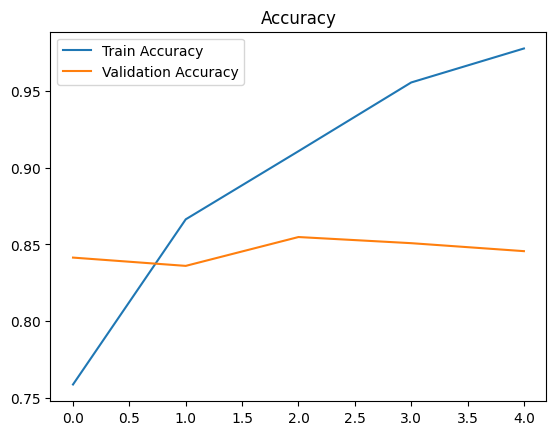

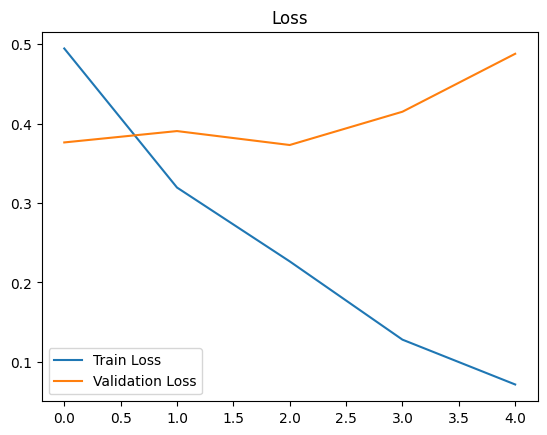

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'],
label='Validation Accuracy')
plt.title("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'],
label='Validation Loss')
plt.title("Loss")
plt.legend()
plt.show()